# Week 3 Discussion

## Infographic

* [Fourier Transforms of Images](https://plus.maths.org/content/fourier-transforms-images)

## Links

* [We Recommend a Singular Value Decomposition][svd] -- if you want to understand the math behind the SVD
* [Interactive Guide to the Fourier Transform][fourier] -- if you want to understand the math behind the FFT

[svd]: http://www.ams.org/samplings/feature-column/fcarc-svd
[fourier]: https://betterexplained.com/articles/an-interactive-guide-to-the-fourier-transform/

If you're having trouble getting PIL to work, there's another way you can load an image:

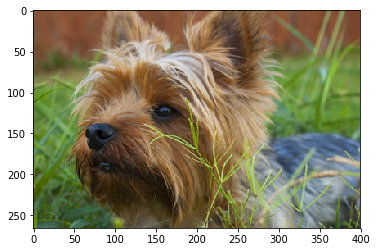

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as img

# # Dog image from https://unsplash.com/photos/jx_kpR7cvDc
dog = img.imread("dog.png")
plt.imshow(dog)
#plt.show()

In [2]:
# Automatically display matplotlib plots, so that we don't have to write `plt.show()`.
# Normally this should be in a cell at the top of the notebook.
%matplotlib inline

Matplotlib is a package for plotting, which we'll use throughout the quarter. Note that if you use matplotlib to load the image, you don't need the `as_image()` function from Assignment 2.

In [7]:
dog.dtype

dtype('float32')

Depending on which package you use to load an image, pixels may be encoded as integers or floating point (decimal) numbers. The scikit-image package has [some documentation](http://scikit-image.org/docs/dev/user_guide/data_types.html) about what these numbers typically mean.

## Debugging

When you get an error message or an incorrect result:

1. If there's an error message, what does the error message mean?
2. Where (what line) did the error come from? You may have to work backward.
3. Use `print()` or the interactive debugger to inspect variables.

In [8]:
def add3(x):
    # Compute something on x to get x_interm
    return x + 3

add3("hi")

TypeError: must be str, not int

The error is "must be str, not int" and points to line 2 of the `add3()` function.

We can trace `x` in line 2 back to the parameter `x`. So maybe something is wrong with our call `add3("hi")`.

We can check by adding a print statement:

In [9]:
def add3(x):
    print(x)
    return x + 3

add3("hi")

hi


TypeError: must be str, not int

We could also use the debugger to check:

In [10]:
# Load the debugger module. This comes with Jupyter.
import IPython.core.debugger as debug

In [12]:
def add3(x):
    debug.Tracer()() # note the doubled ()
    return x + 3

add3("hi")

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `Tracer` is deprecated since version 5.1, directly use `IPython.core.debugger.Pdb.set_trace()`
  


> <ipython-input-12-5812a7e5c59b>(3)add3()
      1 def add3(x):
      2     debug.Tracer()() # note the doubled ()
----> 3     return x + 3
      4 
      5 add3("hi")

ipdb> help break
b(reak) [ ([filename:]lineno | function) [, condition] ]
        Without argument, list all breaks.

        With a line number argument, set a break at this line in the
        current file.  With a function name, set a break at the first
        executable line of that function.  If a second argument is
        present, it is a string specifying an expression which must
        evaluate to true before the breakpoint is honored.

        The line number may be prefixed with a filename and a colon,
        to specify a breakpoint in another file (probably one that
        hasn't been loaded yet).  The file is searched for on
        sys.path; the .py suffix may be omitted.
ipdb> q
Exiting Debugger.


If you're using the terminal, you can instead use:

```python
import ipdb

# To pause the interpreter.
ipdb.set_trace()
```

## Problem Solving: An Example

Break problems into small steps.

If you're trying to figure out how something works, test on small "toy" examples and draw pictures.

In [15]:
import numpy as np
import skimage as ski
import skimage.color

# Switch from (red, green, blue) to (hue, saturation, value).
# Hue is the color (from red to violet).
# Saturation is how colorful (from colorless to colorful).
# Value is how bright (from black to bright color).
dog_hsv = ski.color.rgb2hsv(dog)

Let's try to find all the green pixels and make them red.

How can we do this? Start by taking a small piece of the dog image, say the lower left corner.

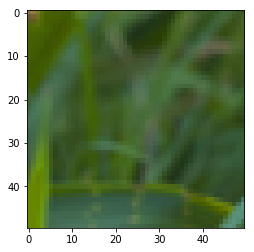

In [19]:
grass = dog_hsv[-50:, :50, :]
plt.imshow(ski.color.hsv2rgb(grass))

How can we figure out what "green" looks like in HSV?

In [23]:
mu = grass.mean(axis = (0, 1))
mu

array([ 0.27836018,  0.54778534,  0.36915452])

We can preview this "green" by making a 2x2 swatch.

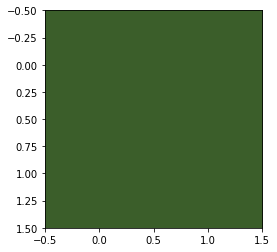

In [34]:
swatch = np.stack(4 * [mu]).reshape((2, 2, 3))
plt.imshow(ski.color.hsv2rgb(swatch))

Now we need to get all pixels with a hue "nearby" the grass mean.

How can we define "nearby"?

In [25]:
sd = grass.std(axis = (0, 1))
sd

array([ 0.05082942,  0.18436516,  0.06428028])

In [27]:
tol = (mu[0] - 3 * sd[0], mu[0] + 3 * sd[0])
tol

(0.12587193331415342, 0.43084843309862059)

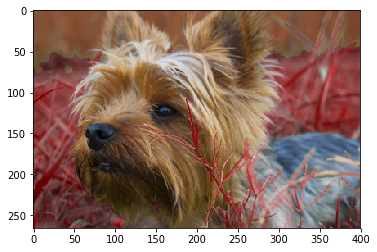

In [35]:
reddog = dog_hsv.copy()
is_green = (tol[0] <= reddog[:, :, 0]) & (reddog[:, :, 0] <= tol[1])
reddog[is_green, 0] = 0
plt.imshow(ski.color.hsv2rgb(reddog))

What would happen if we tried this with RGB instead of HSV?

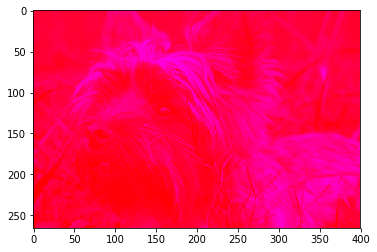

In [37]:
reddog_rgb = dog.copy()
reddog_rgb[:, :, 0] = 1 # Set red channel to large value.
reddog_rgb[:, :, 1] = 0 # Set green channel to small value.
plt.imshow(reddog_rgb)

Even if we are more careful about what we call "green", the result with RGB is not great:

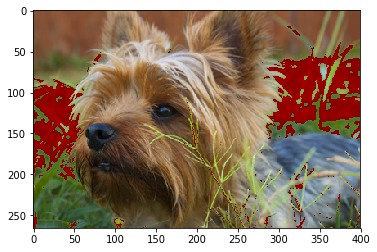

In [42]:
reddog_rgb = dog.copy()
is_green = (reddog_rgb[:, :, 0] < 0.5) & (reddog_rgb[:, :, 1] > 0.5) & (reddog_rgb[:, :, 2] < 0.5)
reddog_rgb[is_green, 0] = reddog_rgb[is_green, 1]
reddog_rgb[is_green, 1] = 0
reddog_rgb[is_green, 2] = 0
plt.imshow(reddog_rgb)

## Assignment Hints

There's really not a lot of code to write for this assignment. In my solutions, I had 9 lines of code (LOC) for part 1, 20 LOC for part 2, and 20 LOC for part 3 (excluding docstrings).

---

The $D$ output from `np.linalg.svd()` is the non-zero diagonal _only_. The off-diagonal entries are not included.

---

Parts 2 and 3 show two different ways to compress an image. In image compression, the goal is to reduce how many bytes are needed to store the image. In part 2, the idea is that we can compute

$$
XV_q \text{ and } V_q^T
$$

which are $n \times q$ and $q \times p$ matrices. If we choose $q$ so that

$$
nq + qp < np,
$$

then we use fewer numbers (matrix elements) to store the image, and thus fewer bytes. When we actually want to look at the image, we can reconstruct it because

$$
XV_q V_q^T \approx XI = X
$$

While $V V^T = I$, removing some rows from $V$ means the equality is no longer strict. That is, $V_q V_q^T \approx I$.

In part 3, the FFT equivalent of $U$ and $V$ do not depend on $X$. So we only need to store the coefficient matrix (that is, $D$), but the coefficient matrix is no longer diagonal. So to reduce the size of the coefficient matrix, we set some coefficients in the lower right corner to 0. For instance, we could set the lower right $r \times r$ square to 0. Then we only need to store the non-zero coefficients. If the number of non-zero coefficients is $q$ (you can compute $q$ based on $r$), then we need to store $q$ numbers.

When comparing FFT and SVD compression, keep in mind that for the SVD we need to store $nq + qp$ numbers.

---

Part 2 is also showing how to do a dimension reduction technique called principal components analysis (PCA). In dimension reduction, you have some $n \times p$ data set, and the goal is to make $p$ smaller (eliminate covariates) without losing too much information.

So for PCA, we use $X V_q$ as the new data set because this $n \times q$ matrix still has $n$ observations but now has only $q$ covariates (which are harder to interpret). The matrix $V_q^T$ is less important in PCA, since we don't want to reconstruct the original $n \times p$ data set.

---

Use `@` for matrix multiplication rather than `.dot()`. It's easier to read `X @ V` than `X.dot(V)`.

---

Don't worry about $q$ in exercise 3.1. Instead, take an argument $r$ that indicates the size of the square to zero-out in the lower right corner of the coefficient matrix. In exercise 3.2, for a fixed $r$ you can compute $q$ (you could even write a function to do this), since $q$ is just the number of elements in the coefficient matrix minus $r^2$.